# Value at Risk calculation - whole portfolio

*Assuming equal portfolio weights (changable as the need arises)*

In [93]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib

In [111]:
# Params:
confidence_interval = 0.95
portfolio_value = 100000  # €
startDate = "2015-01-01"
endDate = "2025-01-01"
tickers = ['SPOT', 'NVDA', 'GOOGL', 'PLD', 'AMT']
years = 3
days = 252 * years 

In [112]:
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=startDate, end=endDate)
    adj_close_df[ticker] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [113]:
# Log returns
log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns = log_returns.dropna()

In [114]:
log_returns.head()

,SPOT,NVDA,GOOGL,PLD,AMT
Date,,,,,
2018-04-04,-0.032673,0.003942,0.010770,0.006781,0.011460
2018-04-05,-0.001596,-0.021716,0.002841,-0.006295,0.007175
2018-04-06,0.026928,-0.032738,-0.022218,-0.008455,-0.013416
2018-04-09,0.013964,0.005400,0.009990,0.001305,0.007219
2018-04-10,0.032144,0.056408,0.015959,0.004556,-0.036024


In [115]:
# Equal weights:
weight = np.array([1 / len(tickers)] * len(tickers))
print("Portfolio weights:", weight)

Portfolio weights: [0.2 0.2 0.2 0.2 0.2]


In [116]:
# Historical returns
historical_returns = (log_returns * weight).sum(axis=1)


# Rolling returns
range_returns = historical_returns.rolling(window=days).sum()
range_returns = range_returns.dropna()

historical_returns

Date
2018-04-04    0.000056
2018-04-05   -0.003918
2018-04-06   -0.009980
2018-04-09    0.007576
2018-04-10    0.014609
                ...   
2024-12-24    0.006063
2024-12-26    0.000821
2024-12-27   -0.011448
2024-12-30   -0.003161
2024-12-31   -0.005941
Length: 1698, dtype: float64

In [117]:
# Calculate Value at Risk (VaR)
VaR = np.percentile(range_returns, 100 - (confidence_interval * 100)) * portfolio_value
print(f"Value at Risk (VaR): {round(VaR,2)}€")

Value at Risk (VaR): 22103.83€


This means that in the 95% level of confidence, the worst thing that can happen is that we lose this amount of money.

The worst thing that can happen (taking into consideration the 95% confidence interval) is that we lose this amount of money. 

Only in 5% of scenerios, we'll lose more

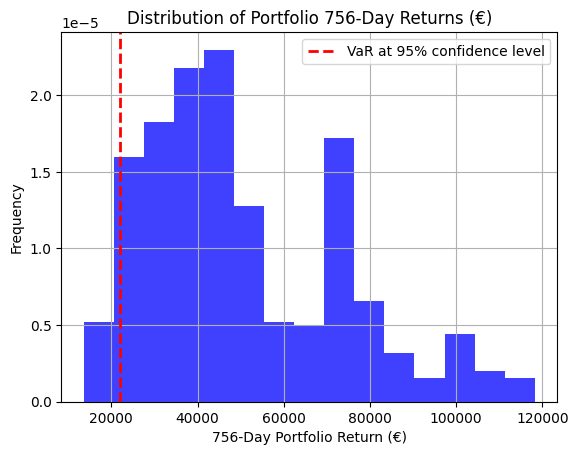

In [120]:
range_returns_value = range_returns * portfolio_value

plt.hist(range_returns_value, bins=15, density=True, alpha=0.75, color='blue')
plt.xlabel(f'{days}-Day Portfolio Return (€)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns (€)')
plt.axvline(VaR, color='r', linestyle='dashed', linewidth=2, label=f'VaR at {confidence_interval:.0%} confidence level')
plt.legend()
plt.grid(True)
plt.show()

## VaR for only one asset

[*********************100%%**********************]  1 of 1 completed


Historical VaR (95% confidence level): -0.58%


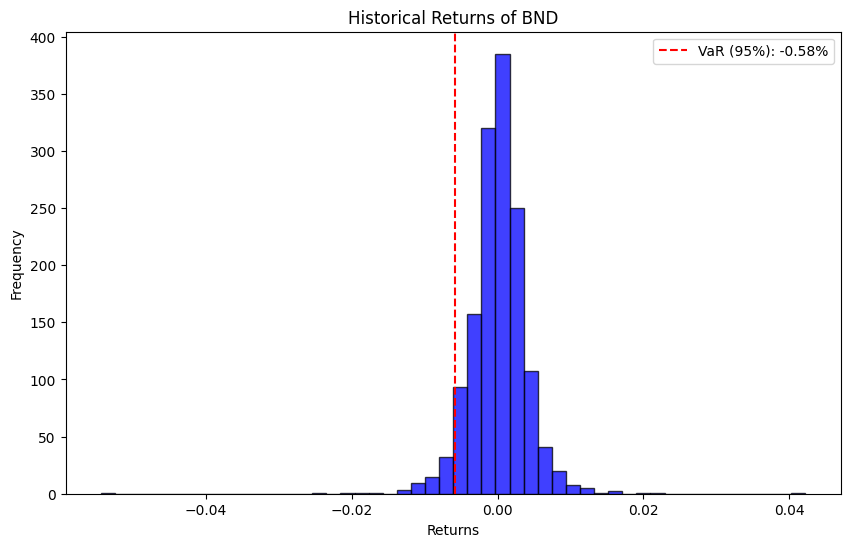

In [102]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Fetch historical data for a stock
stock = 'BND'
data = yf.download(stock, start="2019-01-01", end="2024-10-16")
returns = data['Adj Close'].pct_change().dropna()

# Calculate the historical VaR at 95% confidence level
confidence_level = 0.95
VaR_historical = np.percentile(returns, (1 - confidence_level) * 100)

print(f"Historical VaR (95% confidence level): {VaR_historical:.2%}")

# Plot the historical returns and VaR threshold
plt.figure(figsize=(10, 6))
plt.hist(returns, bins=50, alpha=0.75, color='blue', edgecolor='black')
plt.axvline(VaR_historical, color='red', linestyle='--', label=f'VaR (95%): {VaR_historical:.2%}')
plt.title(f'Historical Returns of {stock}')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.legend()
plt.show()